<a href="https://colab.research.google.com/github/balaprasanna20/ml-demo/blob/main/k%20means%20knn%20report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
df=pd.read_csv('/content/Automobile.csv')
df


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Read csv file
df = pd.read_csv('/content/Automobile.csv')

# Convert 'horsepower' to numeric, coercing errors to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill missing horsepower values with the mean
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

# Select numeric columns for clustering
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols]


# Perform clustering
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(df_numeric)

# Calculate Silhouette Score
silhouette = silhouette_score(df_numeric, kmeans.labels_)

# Create report
report_df = pd.DataFrame({'Cluster': kmeans.labels_, 'Silhouette Score': silhouette})
report_df.to_excel('clustering_report.xlsx',index=False)

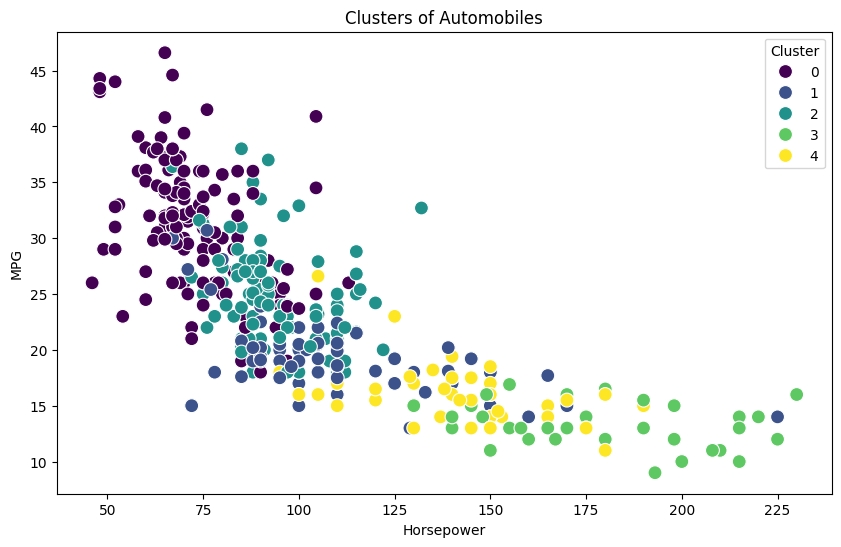

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horsepower', y='mpg', hue=kmeans.labels_, palette='viridis', s=100)
plt.title('Clusters of Automobiles')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend(title='Cluster')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the clustering report to get the cluster labels
report_df = pd.read_excel('clustering_report.xlsx')

# Add the cluster labels to our numeric dataframe
df_numeric['Cluster'] = report_df['Cluster']

# Separate features (X) and target (y)
X = df_numeric.drop('Cluster', axis=1)
y = df_numeric['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df_knn = pd.DataFrame(report).transpose()

# Save the report to an Excel file
report_df_knn.to_excel('knn_classification_report.xlsx')

print("KNN classification report generated and saved to 'knn_classification_report.xlsx'")
display(report_df_knn)

KNN classification report generated and saved to 'knn_classification_report.xlsx'


/tmp/ipython-input-14-2178038132.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Cluster'] = report_df['Cluster']


,precision,recall,f1-score,support
0,1.0,1.0,1.0,27.0
1,1.0,1.0,1.0,9.0
2,1.0,1.0,1.0,25.0
3,1.0,1.0,1.0,12.0
4,1.0,1.0,1.0,7.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,80.0
weighted avg,1.0,1.0,1.0,80.0
